In this homework, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this homework across all problems, use 80%, 20% split. We will also use US Housing dataset with  80% and 20% split between training and evaluation (test) sets.


In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [168]:
trainSize = 0.8
testSize = 0.2


Problem 1 (50pts):

Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

1. Identify the optimum number of K, principal components that achieve the highest classification accuracy. 
2. Plot your classification accuracy, precision, and recall over a different number of Ks. 
3. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.
4. Compare your results against the logistic regression that you have done in homework 3.

Make sure to explain and elaborate your results.


In [169]:
#data for training
cancer_df = load_breast_cancer(as_frame = True)
X = cancer_df.data
Y = cancer_df.target
sc_X = StandardScaler()
X.shape

(569, 30)

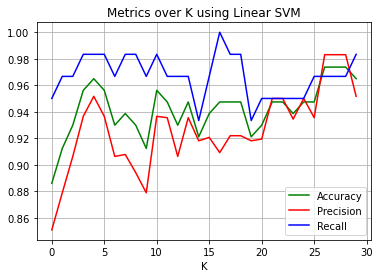

In [170]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
K_max = 30
K = np.array(range(K_max))
acc = np.zeros(K_max)
prec = np.zeros(K_max)
recall = np.zeros(K_max)

model = SVC(kernel='linear', C=25)

for k in K:
    pca = PCA(n_components=k+1)
    X_pca = pca.fit_transform(X)
    x_train_pca, x_test_pca, y_train, expected = tts(X_pca, Y, train_size = trainSize, test_size = testSize, random_state=69)
    
    x_train_pca = sc_X.fit_transform(x_train_pca)
    x_test_pca = sc_X.transform(x_test_pca)
    
    model.fit(x_train_pca, y_train)
    y_pred = model.predict(x_test_pca) # Predictions
    
    acc[k] = metrics.accuracy_score(expected,y_pred)
    prec[k] = metrics.precision_score(expected,y_pred)
    recall[k] = metrics.recall_score(expected,y_pred)
    
plt.plot(K,acc[K], color='green', label='Accuracy')
plt.plot(K,prec[K], color='red', label='Precision')
plt.plot(K,recall[K], color='blue', label='Recall')
plt.grid() 
plt.xlabel('K') 
plt.ylabel('') 
plt.title('Metrics over K using Linear SVM') 
plt.legend() 
plt.show()

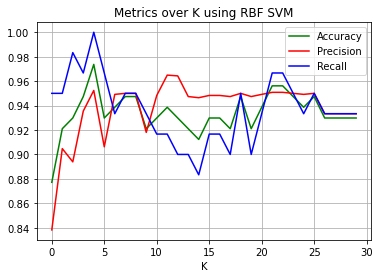

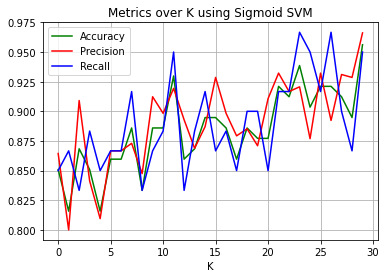

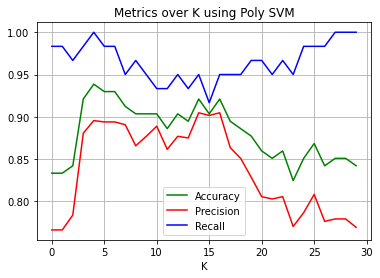

In [171]:
#rbf kernel
model = SVC(kernel='rbf', C=25)

for k in K:
    pca = PCA(n_components=k+1)
    X_pca = pca.fit_transform(X)
    x_train_pca, x_test_pca, y_train, expected = tts(X_pca, Y, train_size = trainSize, test_size = testSize, random_state=69)
    
    x_train_pca = sc_X.fit_transform(x_train_pca)
    x_test_pca = sc_X.transform(x_test_pca)
    
    model.fit(x_train_pca, y_train)
    y_pred = model.predict(x_test_pca) # Predictions
    
    acc[k] = metrics.accuracy_score(expected,y_pred)
    prec[k] = metrics.precision_score(expected,y_pred)
    recall[k] = metrics.recall_score(expected,y_pred)
    
plt.plot(K,acc[K], color='green', label='Accuracy')
plt.plot(K,prec[K], color='red', label='Precision')
plt.plot(K,recall[K], color='blue', label='Recall')
plt.grid() 
plt.xlabel('K') 
plt.ylabel('') 
plt.title('Metrics over K using RBF SVM') 
plt.legend() 
plt.show()

#sigmoid kernel
model = SVC(kernel='sigmoid', C=25)

for k in K:
    pca = PCA(n_components=k+1)
    X_pca = pca.fit_transform(X)
    x_train_pca, x_test_pca, y_train, expected = tts(X_pca, Y, train_size = trainSize, test_size = testSize, random_state=69)
    
    x_train_pca = sc_X.fit_transform(x_train_pca)
    x_test_pca = sc_X.transform(x_test_pca)
    
    model.fit(x_train_pca, y_train)
    y_pred = model.predict(x_test_pca) # Predictions
    
    acc[k] = metrics.accuracy_score(expected,y_pred)
    prec[k] = metrics.precision_score(expected,y_pred)
    recall[k] = metrics.recall_score(expected,y_pred)
    
plt.plot(K,acc[K], color='green', label='Accuracy')
plt.plot(K,prec[K], color='red', label='Precision')
plt.plot(K,recall[K], color='blue', label='Recall')
plt.grid() 
plt.xlabel('K') 
plt.ylabel('') 
plt.title('Metrics over K using Sigmoid SVM') 
plt.legend() 
plt.show()

#poly kernel
model = SVC(kernel='poly', C=25)

for k in K:
    pca = PCA(n_components=k+1)
    X_pca = pca.fit_transform(X)
    x_train_pca, x_test_pca, y_train, expected = tts(X_pca, Y, train_size = trainSize, test_size = testSize, random_state=69)
    
    x_train_pca = sc_X.fit_transform(x_train_pca)
    x_test_pca = sc_X.transform(x_test_pca)
    
    model.fit(x_train_pca, y_train)
    y_pred = model.predict(x_test_pca) # Predictions
    
    acc[k] = metrics.accuracy_score(expected,y_pred)
    prec[k] = metrics.precision_score(expected,y_pred)
    recall[k] = metrics.recall_score(expected,y_pred)
    
plt.plot(K,acc[K], color='green', label='Accuracy')
plt.plot(K,prec[K], color='red', label='Precision')
plt.plot(K,recall[K], color='blue', label='Recall')
plt.grid() 
plt.xlabel('K') 
plt.ylabel('') 
plt.title('Metrics over K using Poly SVM') 
plt.legend() 
plt.show()

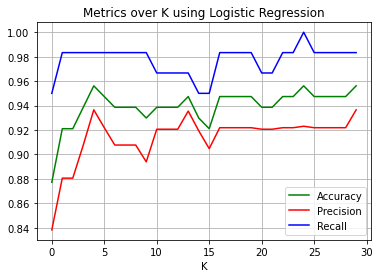

In [172]:
#from last homework
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state = 0)
K_max = 30
K = np.array(range(K_max))
acc = np.zeros(K_max)
prec = np.zeros(K_max)
recall = np.zeros(K_max)


for k in K:
    pca = PCA(n_components=k+1)
    X_pca = pca.fit_transform(X)
    x_train_pca, x_test_pca, y_train, expected = tts(X_pca, Y, train_size = trainSize, test_size = testSize, random_state=69)
    
    x_train_pca = sc_X.fit_transform(x_train_pca)
    x_test_pca = sc_X.transform(x_test_pca)
    
    logReg.fit(x_train_pca, y_train)
    y_pred = logReg.predict(x_test_pca) # Predictions
    
    acc[k] = metrics.accuracy_score(expected,y_pred)
    prec[k] = metrics.precision_score(expected,y_pred)
    recall[k] = metrics.recall_score(expected,y_pred)
    
plt.plot(K,acc[K], color='green', label='Accuracy')
plt.plot(K,prec[K], color='red', label='Precision')
plt.plot(K,recall[K], color='blue', label='Recall')
plt.grid() 
plt.xlabel('K') 
plt.ylabel('') 
plt.title('Metrics over K using Logistic Regression') 
plt.legend() 


Problem 2 (50pts):

Develop a SVR regression model that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

1. Plot your regression model for SVR similar to the sample code provided on Canvas.
2. Compare your results against linear regression with regularization loss that you already did in homework1. 
3. Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest regression accuracy. 
4. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.


In [173]:
from sklearn.svm import SVR

#prep data
housing = pd.read_csv('https://raw.githubusercontent.com/pcur/ECGR-4105/main/Homework%201/Housing.csv')

def binary_map(x):
    return x.map({'yes':1,"no":0})

varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

housing.shape
housing[varlist] = housing[varlist].apply(binary_map)
housing.shape

Y_house = housing.values[:,0]

area = housing.values[:,1].reshape(len(Y_house),1)
rooms = housing.values[:,2].reshape(len(Y_house),1)
bath = housing.values[:,3].reshape(len(Y_house),1)
floor = housing.values[:,4].reshape(len(Y_house),1)
park = housing.values[:,10].reshape(len(Y_house),1)
road = housing.values[:,5].reshape(len(Y_house),1)
guest = housing.values[:,6].reshape(len(Y_house),1)
basement = housing.values[:,7].reshape(len(Y_house),1)
hotwater = housing.values[:,8].reshape(len(Y_house),1)
ac = housing.values[:,9].reshape(len(Y_house),1)
pref = housing.values[:,11].reshape(len(Y_house),1)

X_house = np.hstack((area,rooms,bath,floor,road,park,guest,basement,hotwater,ac,pref))

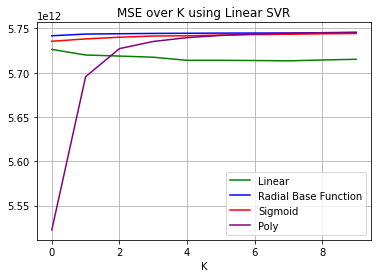

In [175]:
from sklearn.metrics import mean_squared_error
K_max = 10
K_house = np.array(range(K_max))
acc_house_lin = np.zeros(K_max)
acc_house_rbf = np.zeros(K_max)
acc_house_sig = np.zeros(K_max)
acc_house_poly = np.zeros(K_max)


svrlin = SVR(kernel='linear', C=25)
svrrbf = SVR(kernel='rbf', C=25)
svrsig = SVR(kernel='sigmoid', C=25)
svrpoly = SVR(kernel='poly', C=25)

for k in K_house:
    pca = PCA(n_components=k+1)
    X_pca_house = pca.fit_transform(X_house)
    x_train_pca_house, x_test_pca_house, y_train_house, expected_house = tts(X_pca_house, Y_house, train_size = trainSize, test_size = testSize, random_state=69)
    
    x_train_pca_house = sc_X.fit_transform(x_train_pca_house)
    x_test_pca_house = sc_X.transform(x_test_pca_house)

    svrlin.fit(x_train_pca_house, y_train_house)
    y_pred_lin = svrlin.predict(x_test_pca_house)
    
    svrrbf.fit(x_train_pca_house, y_train_house)
    y_pred_rbf = svrrbf.predict(x_test_pca_house) 
    
    svrsig.fit(x_train_pca_house, y_train_house)
    y_pred_sig = svrsig.predict(x_test_pca_house)
    
    svrpoly.fit(x_train_pca_house, y_train_house)
    y_pred_poly = svrpoly.predict(x_test_pca_house) # Predictions
    
    acc_house_lin[k] = mean_squared_error(expected_house,y_pred_lin)
    acc_house_rbf[k] = mean_squared_error(expected_house,y_pred_rbf)
    acc_house_sig[k] = mean_squared_error(expected_house,y_pred_sig)
    acc_house_poly[k] = mean_squared_error(expected_house,y_pred_poly)

plt.plot(K_house,acc_house_lin[K_house], color='green', label='Linear')
plt.plot(K_house,acc_house_rbf[K_house], color='blue', label='Radial Base Function')
plt.plot(K_house,acc_house_sig[K_house], color='red', label='Sigmoid')
plt.plot(K_house,acc_house_poly[K_house], color='purple', label='Poly')
plt.grid() 
plt.xlabel('K') 
plt.ylabel('') 
plt.title('MSE over K using Linear SVR') 
plt.legend() 
plt.show()